In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import string

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt
from datetime import datetime
import time
from dateutil.parser import parse

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper,
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,cast

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [9]:
# We can view all of the classes that automap found
#  Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station


In [10]:
#getting the max dates
session=Session(engine)
engine.execute('SELECT max(date) FROM measurement ').fetchall()

[('2017-08-23',)]

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Using the inspector to print the column names  and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Using the inspector to print the column names and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

max_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
year_ago= dt.date(2017,8,23)- dt.timedelta(days=365)
#session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
# # Perform a query to retrieve the data and precipitation scores
prcp_scores=session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
df_prcp=pd.DataFrame(prcp_scores, columns=['Dates', 'Prcp'])
df_prcp.set_index('Dates', inplace=True)

# x_axis=[]
# y_axis=df_prcp["Prcp"]
# plt.bar(x_axis, y_axis) 
# plt.tight_layout()
# plt.show()

# df_prcp.plot(kind="bar", figsize=(20,3))
# plt.tight_layout()
# plt.show()

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pand Plotting with Matplotlib to plot the data
#max_date[0]
print(max_date)
print(year_ago)
df_prcp.describe()

('2017-08-23',)
2016-08-23


,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#Option 1Statistics for precipitationdata
df_prcp.describe()

In [23]:
#Option 2
df2 = pd.read_sql('Select prcp, date  from measurement where date >="2016-08-23"', engine)
df2['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [24]:
# Design a query to show how many stations are available in this dataset?
no_of_stations =pd.DataFrame(engine.execute('SELECT distinct(station) from  measurement').fetchall())
# type(no_of_stations)
no_of_stations.count()

session.query(func.distinct(measurement.station)).count()

9

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)
#session.query(measurement, measurement.station).group_by(measurement.station).all()
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#Max Temp for most active station
session.query(func.max(measurement.tobs)).filter(measurement.station =='USC00519281').all()

[(85.0)]

In [21]:
#Min Temp for most active station
session.query(func.min(measurement.tobs)).filter(measurement.station =='USC00519281').all()

[(54.0)]

In [22]:
#Average Temp for most active station
session.query(func.avg(measurement.tobs)).filter(measurement.station =='USC00519281').all()

[(71.66378066378067)]

In [26]:
# Option#2
#Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df1=pd.read_sql('Select * from measurement', engine)
df1.set_index('id')
# tobs=df1[["tobs","station"]].max()
# tobs
df1_9523=df1.loc[df1['station']== 'USC00519281']
max_temp =df1_9523['tobs'].max()
min_temp =df1_9523['tobs'].min()
mean_temp =round(df1_9523['tobs'].mean(),2)
print('MAX Temp for this stattion', max_temp)
print('Min Temp for this stattion', min_temp)
print('AVG Temp for this stattion', mean_temp)

MAX Temp for this stattion 85.0
Min Temp for this stattion 54.0
AVG Temp for this stattion 71.66


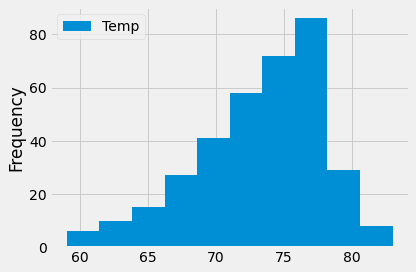

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_date1=session.query(func.max(measurement.date)).filter(measurement.station=='USC00519281').all()
max_date1
year_ago1= dt.date(2017,8,23)- dt.timedelta(days=365)

tobs1=session.query(measurement.date, measurement.tobs).filter(measurement.station=='USC00519281').\
filter(measurement.date >= year_ago1).all()
df_tobs1=pd.DataFrame(tobs1, columns=['Dates', 'Temp'])
#df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
df_tobs1.set_index('Dates', inplace=True)
df_tobs1.plot.hist() 
plt.tight_layout()
plt.show()
# session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()


## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [157]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
